# <font color='blue'>Análise exploratória dos dados</font>

## Montando DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/RedesNeurais/Classificacao/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

drive_dados = '/content/drive/MyDrive/UFSB/Componentes_curriculares/RNA/_01_Classificacao/' # Colocar uma barra no final do endereço

## 1) Importando bibliotecas

Importar as bibliotecas e o arquivo que serão utilizadas durante as análises. 

In [ ]:
# Imports bilbliotecas básica
# ===========================
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Imports bilbliotecas com funções importantes
# ============================================
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 2) Extrai os dados do csv ou txt
Um dos grandes problemas que encontramos é mal uso de separador e de encoding, então é importante se atentar a esses argumentos.

É muito importante ressaltar que colocar os argumentos de separador e de encoding quando está lendo um arquivo evita problemas como os dados que não tenham sido separados corretamente.

Fonte dos dados: Dados pre-processados.

In [ ]:
# Carregando o dataset
dataset = pd.read_csv(drive_dados + "Dados_pre_processados.csv", encoding = 'latin-1', sep = ',')
dataset.drop(columns = ["Unnamed: 0"], inplace=True)
# Verificando as primeiras linhas do dataset
print(dataset.shape)
dataset.head(5)

(90, 8)


,sex,age,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,label
0,2,23,6,1,19,2,1,1
1,2,48,7,1,50,25,1,1
2,2,17,12,3,25,7,1,1
3,1,54,13,3,43,5,1,1
4,2,22,5,1,99,8,1,1


Note que não utilizamos o encoding utf-8, pois com o seu uso podemos ter apenas de 0-127 valores, portanto utilzamos o latin-1, que também é conhecido como ISO-8859–1, e que cobre de 0–255 valores.

## 3) Definindo variáveis contínuas e categóricas (Exceto a saída)
Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. 

Trataremos todas as variáveis com menos de 10 entradas únicas como categóricas.

In [ ]:
# Verificando Valores Únicos
dataset.nunique()

sex                     2
age                    36
Number_of_Warts        16
Type                    3
Area                   65
induration_diameter    12
Result_of_Treatment     2
label                   2
dtype: int64

### 3.1) Dividindo o dataset entre variáveis continuas e categoricas e separando as colunas vinculadas a variável target

In [ ]:
# Preparando os dados para a separação entre variáveis contínuas e categóricas
n_entradas = 10

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas menos as colunas relacionadas ao target
targets = ['Result_of_Treatment', 'label']
columns = [elemento for elemento in dataset.columns if elemento not in targets]
for c in columns:
    if dataset.nunique()[c] >= n_entradas:
        continuous.append(c)
    else:
        categorical.append(c)

#### 3.1.1) Variáveis contínuas

In [ ]:
print(f'{len(continuous)} de {dataset.shape[1]-len(targets)} variáveis de preditoras foram classificadas como continuas no dataset.')
dataset[continuous].head()

4 de 6 variáveis de preditoras foram classificadas como continuas no dataset.


,age,Number_of_Warts,Area,induration_diameter
0,23,6,19,2
1,48,7,50,25
2,17,12,25,7
3,54,13,43,5
4,22,5,99,8


#### 3.1.2) Variáveis categóricas

In [ ]:
print(f'{len(categorical)} de {dataset.shape[1]-len(targets)} variáveis preditoras foram classificadas como categóricas no dataset.')
dataset[categorical].head()

2 de 6 variáveis preditoras foram classificadas como categóricas no dataset.


,sex,Type
0,2,1
1,2,1
2,2,3
3,1,3
4,2,1


### 3.2) Mudando variáveis de classes (contínua/categórica)

In [ ]:
# Remove variáveis da classe continua
val_remove = []
for classe in val_remove:
    if(classe in continuous):
        continuous.remove(classe)
        categorical.append(classe)
    
# Variáveis continuas
dataset[continuous].head()

,age,Number_of_Warts,Area,induration_diameter
0,23,6,19,2
1,48,7,50,25
2,17,12,25,7
3,54,13,43,5
4,22,5,99,8


In [ ]:
# Remove variáveis da classe categórica
val_remove = []
for classe in val_remove:
    if(classe in categorical):
        categorical.remove(classe)
        continuous.append(classe)
    
# Variáveis categóricas
dataset[categorical].head()

,sex,Type
0,2,1
1,2,1
2,2,3
3,1,3
4,2,1


## 4) Análise das variáveis contínuas

### 4.1) Análise BoxPlot

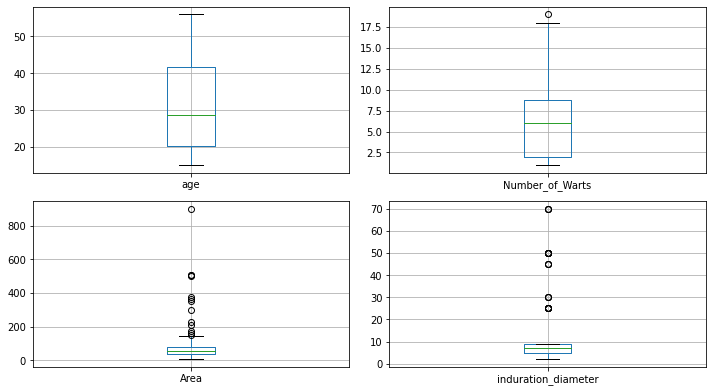

In [ ]:
# Definido faixa de variáveis que serão analisadas
inicio = 0
total_variáveis = len(continuous)

# Tamanho da área de plotagem
fig = plt.figure(figsize = (10,total_variáveis*2))


# Loop pelas variáveis contínuas
for i, col in enumerate(continuous[inicio:inicio+total_variáveis]):
    plt.subplot(int(total_variáveis/2)+1, 2, i + 1);
    dataset.boxplot(col);
    plt.tight_layout()
    
plt.savefig('boxplot1.png')

#### 4.1.1) Removendo outliers

In [ ]:
# Mostra colunas do dataset
dataset.columns

Index(['sex', 'age', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter',
       'Result_of_Treatment', 'label'],
      dtype='object')

In [ ]:
# identificando outiliers de uma coluna
column = 'Area'
y=dataset[column]
removed_outliers = ~y.between(y.quantile(.05), y.quantile(.95))
index_names = dataset[removed_outliers].index # INVERT removed_outliers!!
print(f'Devem ser removidos {len(index_names)} outliers que estão nos seguintes indices:')
print(index_names) # The resulting dates to drop.
print(removed_outliers.value_counts())

Devem ser removidos 9 outliers que estão nos seguintes indices:
Int64Index([9, 28, 43, 44, 53, 58, 60, 65, 74], dtype='int64')
False    81
True      9
Name: Area, dtype: int64


In [ ]:
# Removendo linhas com outliers
# O comando só terá efeito com inplace=True
dataset.drop(index_names, inplace=True)

### 4.2) Matriz de Correlação Entre Variáveis Contínuas.

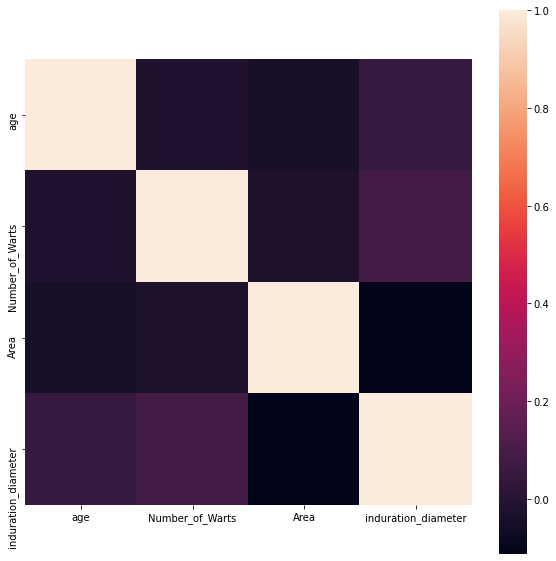

In [ ]:
# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação 
sns.heatmap(dataset[continuous].corr(), vmax = 1., square = True)

## 5) Análise das variáveis categóricas

### 5.1) Visualização da distribuição na categoria principal

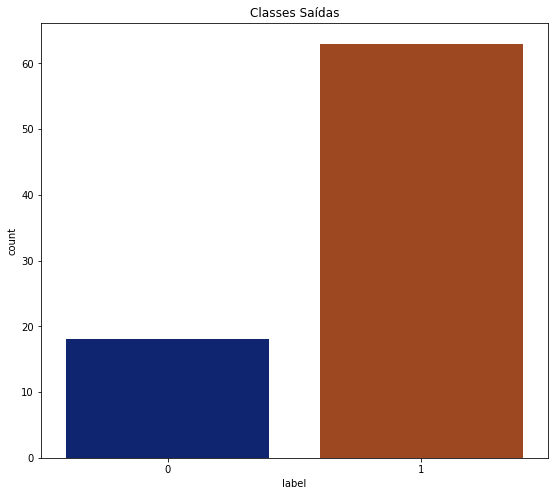

In [ ]:
# Countplot Saída
target = 'label'
plt.figure(figsize = (20,8))
plt.subplot(1,2,2)
plt.title("Classes Saídas")
sns.countplot(x=dataset[target], palette = "dark")

### 5.2) Visualização da distribuição nas categorias secundárias
Analisar como a variável de destino (target) é influenciada por elas.

In [ ]:
# Variáveis categóricas
dataset[categorical].head()

,sex,Type
0,2,1
1,2,1
2,2,3
3,1,3
4,2,1


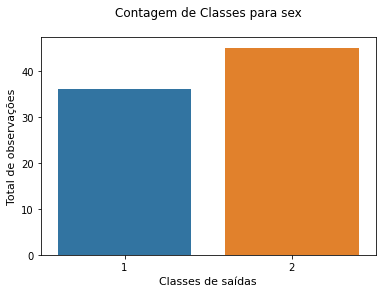

In [ ]:
# Countplot variavel categoria especifica
posicao = 0 # Posição da variável na lista categorical
sns.countplot(x=dataset[dataset[categorical].columns[posicao]])
plt.xlabel('Classes de saídas', fontsize = 11)
plt.ylabel('Total de observações', fontsize = 11)
plt.title(f'Contagem de Classes para {dataset[categorical].columns[posicao]}\n')
plt.show()

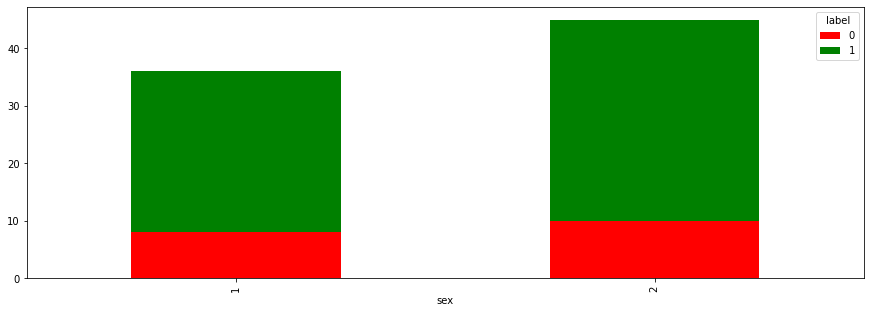

In [ ]:
# Stacked Bar Tipo de Variável x Saida
posicao = 0 # Posição da variável na lista categorical
var_considerada = dataset[categorical].columns[posicao]
var_saida = dataset.columns[-1] # Variável de saída considerada
pd.crosstab(dataset[var_considerada], dataset[var_saida]).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green', 'b', 'k'])

## 6) Aplica encoder em todas as variáveis categoricas

In [ ]:
# Cria o encoder para as variáveis categóricas
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
for var in categorical:
    dataset.loc[:,var] = lb.fit_transform(dataset[var])

# Verificando valores missing
print(dataset.isna().sum())

sex                    0
age                    0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
label                  0
dtype: int64


In [ ]:
# Remove valores missing eventualmente gerados
# O comando só terá efeito com inplace=True
dataset.dropna(inplace = False)

,sex,age,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,label
0,1,23,6,0,19,2,1,1
1,1,48,7,0,50,25,1,1
2,1,17,12,2,25,7,1,1
3,0,54,13,2,43,5,1,1
4,1,22,5,0,99,8,1,1
...,...,...,...,...,...,...,...,...
85,1,51,1,0,65,7,1,1
86,0,40,8,2,69,5,1,1
87,1,16,11,0,47,7,1,1
88,0,20,6,0,45,8,1,1


In [ ]:
# Verificando Valores Únicos
dataset.nunique()

sex                     2
age                    36
Number_of_Warts        16
Type                    3
Area                   57
induration_diameter    12
Result_of_Treatment     2
label                   2
dtype: int64

In [ ]:
# Variáveis categóricas após encoder
dataset[categorical]

,sex,Type
0,1,0
1,1,0
2,1,2
3,0,2
4,1,0
...,...,...
85,1,0
86,0,2
87,1,0
88,0,0


## 7) Recomposição da base de dados

In [ ]:
dataset.columns

Index(['sex', 'age', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter',
       'Result_of_Treatment', 'label'],
      dtype='object')

In [ ]:
# Definir variáveis de entrada
column_label_end = ['label']
columns_input = [elemento for elemento in dataset.columns if elemento not in column_label_end]


X = dataset[columns_input]
y = dataset[column_label_end]

X_res = X
y_res = y

In [ ]:
columns = [elemento for elemento in dataset.columns if not elemento in column_label_end]
dados_input = pd.DataFrame(X_res, columns = columns)

In [ ]:
columns = column_label_end
dados_target = pd.DataFrame(y_res, columns = columns)

In [ ]:
dataset = pd.concat([dados_input, dados_target], axis=1) # Reconstroi pands (dados)
dataset.shape

(81, 8)

## 8) Salvar dataset após resultado da análise exploratória

In [ ]:
dataset.to_csv(drive_dados + 'Dados_analise_exploratoria.csv', index = True)
dataset

,sex,age,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,label
0,1,23,6,0,19,2,1,1
1,1,48,7,0,50,25,1,1
2,1,17,12,2,25,7,1,1
3,0,54,13,2,43,5,1,1
4,1,22,5,0,99,8,1,1
...,...,...,...,...,...,...,...,...
85,1,51,1,0,65,7,1,1
86,0,40,8,2,69,5,1,1
87,1,16,11,0,47,7,1,1
88,0,20,6,0,45,8,1,1
